# 12/01/2021

Il datataset  contiene  dati  relativi  a  pazienti  in  cura  in  un  ospedale, 
utilizzando le seguenti feature: 
 
Name / Data Type / Value Sample/ Description 
HAEMATOCRIT /Continuous /35.1 / Patient laboratory test result of haematocrit 
HAEMOGLOBINS/Continuous/11.8 / Patient laboratory test result of haemoglobins 
ERYTHROCYTE/Continuous/4.65 / Patient laboratory test result of erythrocyte 
LEUCOCYTE /Continuous /6.3 / Patient laboratory test result of leucocyte 
THROMBOCYTE/Continuous/310/ Patient laboratory test result of thrombocyte 
MCH/Continuous /25.4/ Patient laboratory test result of MCH 
MCHC/Continuous/33.6/ Patient laboratory test result of MCHC 
MCV/Continuous /75.5/ Patient laboratory test result of MCV 
AGE/Continuous/12/ Patient age 
SEX/Nominal – Binary/F/ Patient gender 
SOURCE/Nominal/ {1,0}/The class target 1.= in care patient, 0 = out care patient 
 
La variabile da predire è SOURCE.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 

In [2]:
df = pd.read_csv('training_set.csv')
df



,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0
...,...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,M,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,F,1
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,M,0
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,M,0


In [3]:
df.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

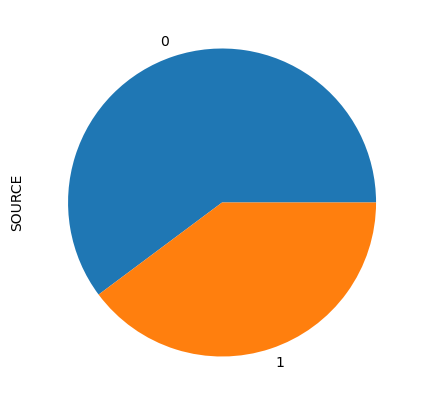

In [4]:
f_classi = df['SOURCE'].value_counts()
plot = f_classi.plot.pie(y='SOURCE', figsize=(5, 5))


vedo se sono presenti tuttw le età da 1 a 99

In [5]:
#per farlo piu veloce
print(df['AGE'].unique().shape[0] )

# o 

print(len(df['AGE'].unique()))

95
95


ho ottenuto solo 95 valori quindi significa che non ci sono tutti le età in range(1,99)

<Axes: >

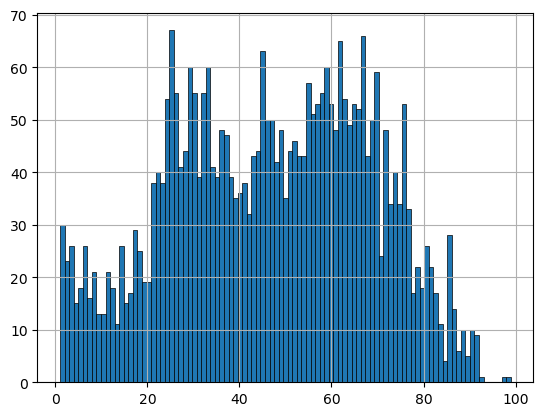

In [6]:
# Le  età  sono  rappresentate  con frequenza simili?
# fallo così e non con value_counts() 
df['AGE'].hist(bins=99, linewidth=0.5, edgecolor='black')
#sotto come non farlo in generale è da provare
# df['AGE'].value_counts(sort=False).plot(kind='bar')


<Axes: >

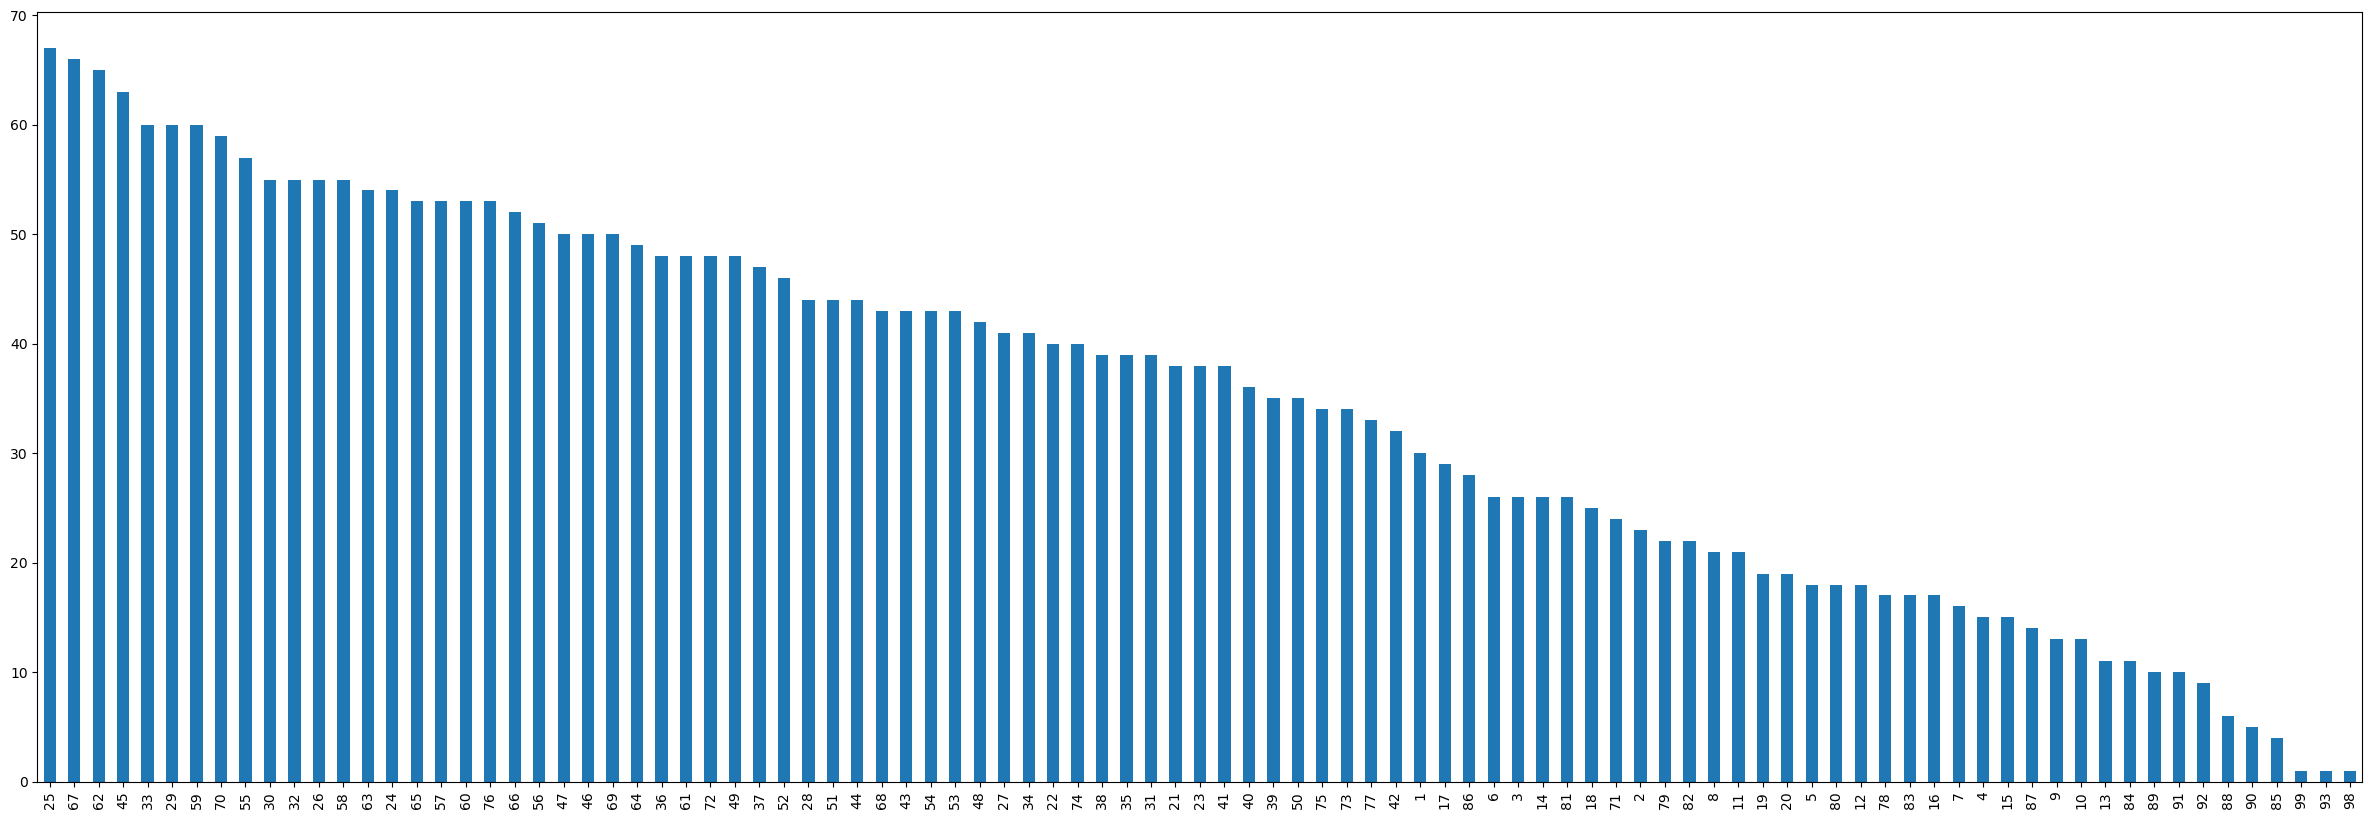

In [7]:
#vedo l'output del modo da non usare in questo caso per vedere le frequenze delle età
# perdo i valori con frequenza nulla
df['AGE'].value_counts(sort=True).plot(kind='bar', figsize=(30, 10))

## Dividere  i  valori  assunti  dalla  variabile  AGE  in  10  gruppi.

In [8]:
 

range_eta = df['AGE'].value_counts(bins=10, sort=False)
#value counts ritorna una serie
print(type(range_eta))
print(range_eta)






<class 'pandas.core.series.Series'>
(0.901, 10.8]    201
(10.8, 20.6]     200
(20.6, 30.4]     492
(30.4, 40.2]     439
(40.2, 50.0]     445
(50.0, 59.8]     452
(59.8, 69.6]     533
(69.6, 79.4]     364
(79.4, 89.2]     156
(89.2, 99.0]      27
Name: AGE, dtype: int64


## Verificare  se  per  ogni  gruppo  sono presenti  un  numero  simile  di  pazienti  rispetto  la  classe  da  predire.


# è meglio aggiungere al dataset una colonn con i range di età
- per farlo faccio il cut di df['AGE'] in 10 bins che vanno da 0 a 100
- aggiungo la colonna 'RANGE_ETA' al dataset

In [9]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
range_eta = pd.cut(df['AGE'], bins)
print(type(range_eta))
df['RANGE_ETA'] = range_eta
print(df)

<class 'pandas.core.series.Series'>
      HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  \
0            33.8          11.1         4.18        4.6          150  26.6   
1            44.6          14.0         6.86        6.3          232  20.4   
2            42.9          14.0         4.57        6.2          336  30.6   
3            41.9          14.4         4.67        3.5          276  30.8   
4            40.6          13.3         4.85       14.9          711  27.4   
...           ...           ...          ...        ...          ...   ...   
3304         39.0          13.2         4.45        4.0           50  29.7   
3305         25.4           8.2         3.27        5.4           90  25.1   
3306         38.2          12.4         4.40        8.4          328  28.2   
3307         43.4          15.2         5.29       10.1          326  28.7   
3308         32.4          10.7         3.66        9.4          214  29.2   

      MCHC   MCV  AGE SEX  

### visualizzo la distribuzione dei pazienti per ogni range di età

per farlo raggruppo dopo il groupby per 'RANGE_ETA' per fare il count di ogni range di età devo usare .size() e non .value_counts() che mi da il conteggio per ogni valore della serie 

In [10]:
range_eta = df.groupby('RANGE_ETA').size().to_frame()

In [11]:
range_eta = df.groupby('RANGE_ETA').size().to_frame()
range_eta.columns = ['FREQUENZA']
range_eta


,FREQUENZA
RANGE_ETA,
"(0, 10]",201
"(10, 20]",200
"(20, 30]",492
"(30, 40]",439
"(40, 50]",445
"(50, 60]",505
"(60, 70]",539
"(70, 80]",323
"(80, 90]",143


In [12]:
# se voglio farlo con la loc 
range_eta = df.loc[:, ['RANGE_ETA']].value_counts(sort=False).to_frame()
range_eta.columns = ['FREQUENZA']
range_eta

,FREQUENZA
RANGE_ETA,
"(0, 10]",201
"(10, 20]",200
"(20, 30]",492
"(30, 40]",439
"(40, 50]",445
"(50, 60]",505
"(60, 70]",539
"(70, 80]",323
"(80, 90]",143


<Axes: xlabel='RANGE_ETA'>

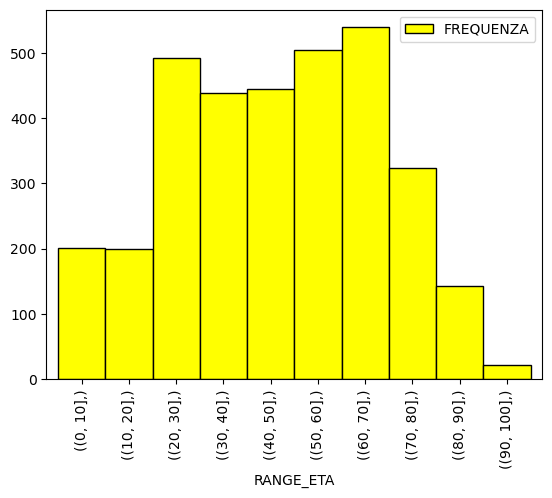

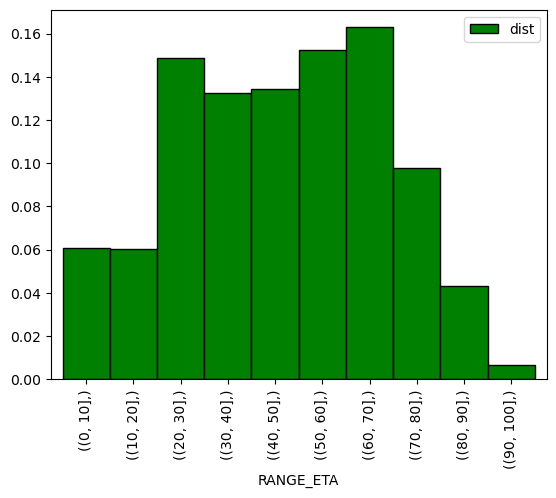

In [13]:
range_eta['dist'] = range_eta['FREQUENZA'] / range_eta['FREQUENZA'].sum()
range_eta

plt.figure()
range_eta['FREQUENZA'].plot.bar(width=1, color='yellow', edgecolor='black', legend=True)
plt.figure()
range_eta['dist'].plot.bar(width=1, color='g', edgecolor='black', legend=True)

### se voglio visualizzare la distribuzione di una variabile categorica rispetto a una numerica ottenuta con il groupby:

### uso il groupby('variabile categorica') e poi faccio il value_counts() per ogni gruppo


Raggruppo le classi del dataframe per 'SEX':
-uso il groupby('SEX') e poi faccio il value_counts() per ogni gruppo
- avro quattro gruppi:
    - F e SOURCE = 0
    - F e SOURCE = 1
    - M e SOURCE = 0
    - M e SOURCE = 1

- scelgo di visualizzare la distribuzione su un diagramma a torta o un plot a barre

In [14]:
#non fare cosi:
class_sex_2 = df['SOURCE'].groupby(df['SEX']).value_counts(sort=False)
class_sex_2

SEX  SOURCE
F    0          989
     1          577
M    0         1003
     1          740
Name: SOURCE, dtype: int64

In [15]:
class_sex_2.unstack()


SOURCE,0,1
SEX,,
F,989,577
M,1003,740


<Axes: xlabel='SEX,SOURCE'>

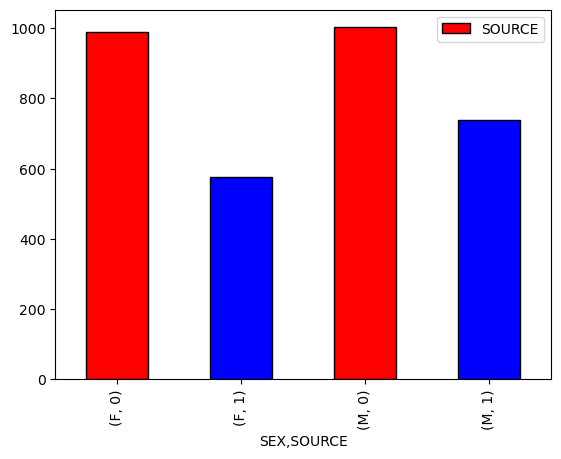

In [16]:
#si ottiene un grafico brutto
class_sex_2.plot.bar(width=0.5, color=['red', 'blue'], edgecolor='black', legend=True)

In [17]:
# è meglio raggruppare cosi nel grupby
class_sex = df.groupby('SEX')['SOURCE'].value_counts()


In [18]:
# per il grafico a torta
# plt = class_sex.plot(kind='pie', figsize=(20, 10), autopct='%1.1f%%')
# plt.yaxis.set_visible(False) # per nascondere le etichette sull'asse y


per usare il plot a barre devo trasformare la serie ottenuta da groupby().value_counts() in un dataframe cosi posso usare il metodo plot.bar() di pandas

In [19]:
# unstack() trasforma la serie in un dataframe
class_sex = class_sex.unstack()
class_sex

SOURCE,0,1
SEX,,
F,989,577
M,1003,740


<Axes: xlabel='SEX'>

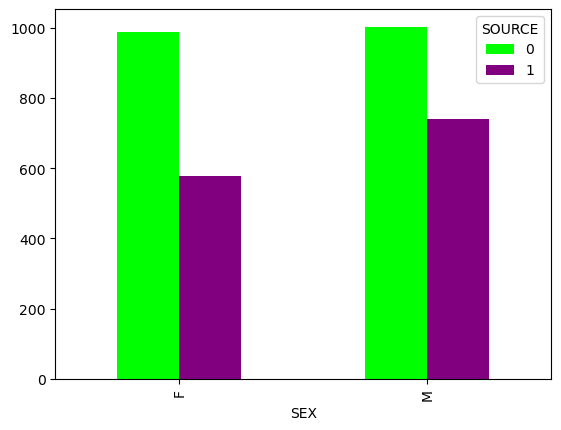

In [20]:

class_sex.plot.bar(color= ('lime', 'purple'))

Con seaborn si fa il doppio piu veloce perchè fa da solo il groupby e il value_counts() e poi fa il plot

In [21]:
import seaborn as sns


<Axes: xlabel='SEX', ylabel='count'>

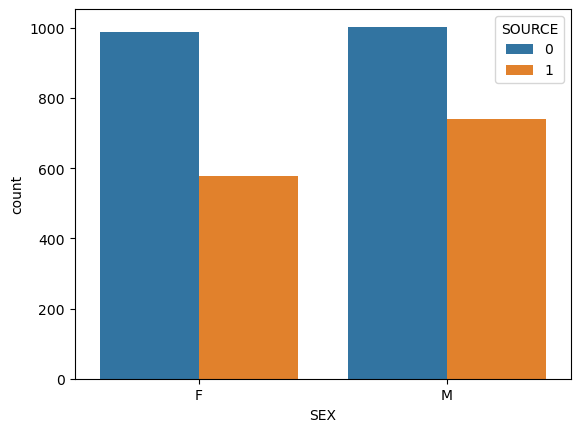

In [22]:
sns.countplot(df, x = 'SEX', hue='SOURCE')

## . Verificare se è vero che le donne si ammalano meno degli uomini. 

## Rappresentare graficamente se possibile quanto emerge dai dati.(punti 2) 

in questo caso non è piu veloce farlo con seaborn perchè dovrei comunque fare il groupby e il value_counts() e lo converto in dataframe per fare il plot, e uso direttamente plot.bar() di pandas

In [23]:
class_sex

SOURCE,0,1
SEX,,
F,989,577
M,1003,740


SOURCE     0    1
SEX              
M       1003  740
<class 'pandas.core.frame.DataFrame'>


<Axes: xlabel='SEX'>

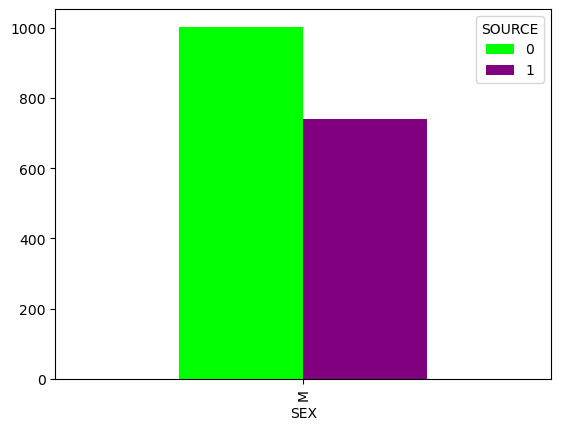

In [24]:
# selezione riga di class sex con SOURCE = 1
# SE SI IMPALLA STAMPA IL DATAFRAME PER CONTROLLARE CHE NON SIA UNA SERIES
print(class_sex[1:2]) # dataframe
print(type(class_sex[1:2])) 

class_sex[1:2].plot.bar(color= ('lime', 'purple'))


dal grafico precedente si vede che le donne si ammalano meno degli uomini in quanto ci sono circa.

In verità dovrai fare tali valori normalizzati con il n° di donne e n° di uomini per vedre in percentuale quanti uomini e donne si ammalano rispetto al totale di ogni genere

## Realizzare una pivot_table in cui rappresentare come si comporta la classe da predire rispetto i 10 gruppi di AGE (sulle righe), e il SEX (sulle colonne) (punti 3)

In [25]:
pivot_table = df.pivot_table(index= 'RANGE_ETA', columns='SEX',  values='SOURCE', aggfunc='count') #aggfunc='count' conta gli elementi di della colonna per ogni attributo delle righe

pivot_table

SEX,F,M
RANGE_ETA,,
"(0, 10]",96,105
"(10, 20]",92,108
"(20, 30]",247,245
"(30, 40]",228,211
"(40, 50]",209,236
"(50, 60]",217,288
"(60, 70]",250,289
"(70, 80]",131,192
"(80, 90]",75,68


# Parte 2: Trasformazione e Predizione (22 punti)

### 1. Si vuole predire il valore di SOURCE sulla base degli attributi presenti nel dataset. Ricaricare il dataset originale, rendere gli attributi numerici, e dividerlo in modo che 2/3 degli elementi siano contenuti in un nuovo dataset “train” e 1/3 nel dataset “test”.

In [26]:
data = pd.read_csv('training_set.csv')
data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0
...,...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,M,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,F,1
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,M,0
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,M,0


In [27]:
from sklearn import preprocessing
import numpy as np

### rendo gli attributi categorici in numerici con l'ordinale encoder
- mappa ogni valore categorico differente di una colonna in un numero intero

In [28]:
oe = preprocessing.OrdinalEncoder()
oe.fit(data)

OrdinalEncoder()

In [29]:
dt = oe.transform(data)
dt = pd.DataFrame(dt, columns=data.columns)
dt

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,123.0,54.0,166.0,35.0,130.0,94.0,50.0,185.0,32.0,0.0,1.0
1,231.0,83.0,390.0,52.0,212.0,35.0,36.0,42.0,35.0,1.0,0.0
2,214.0,83.0,205.0,51.0,316.0,134.0,48.0,315.0,69.0,0.0,0.0
3,204.0,87.0,215.0,24.0,256.0,136.0,66.0,273.0,17.0,0.0,0.0
4,191.0,76.0,233.0,138.0,509.0,102.0,50.0,213.0,35.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3304,175.0,75.0,193.0,29.0,33.0,125.0,60.0,252.0,44.0,1.0,1.0
3305,40.0,25.0,75.0,43.0,70.0,79.0,45.0,153.0,0.0,0.0,1.0
3306,167.0,67.0,188.0,73.0,308.0,110.0,47.0,244.0,63.0,1.0,0.0
3307,219.0,95.0,277.0,90.0,306.0,115.0,72.0,196.0,32.0,1.0,0.0


In [30]:
dataset = dt.drop('SOURCE', axis=1)
dataset

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,123.0,54.0,166.0,35.0,130.0,94.0,50.0,185.0,32.0,0.0
1,231.0,83.0,390.0,52.0,212.0,35.0,36.0,42.0,35.0,1.0
2,214.0,83.0,205.0,51.0,316.0,134.0,48.0,315.0,69.0,0.0
3,204.0,87.0,215.0,24.0,256.0,136.0,66.0,273.0,17.0,0.0
4,191.0,76.0,233.0,138.0,509.0,102.0,50.0,213.0,35.0,1.0
...,...,...,...,...,...,...,...,...,...,...
3304,175.0,75.0,193.0,29.0,33.0,125.0,60.0,252.0,44.0,1.0
3305,40.0,25.0,75.0,43.0,70.0,79.0,45.0,153.0,0.0,0.0
3306,167.0,67.0,188.0,73.0,308.0,110.0,47.0,244.0,63.0,1.0
3307,219.0,95.0,277.0,90.0,306.0,115.0,72.0,196.0,32.0,1.0


In [31]:
y = dt['SOURCE']
y

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3304    1.0
3305    1.0
3306    0.0
3307    0.0
3308    1.0
Name: SOURCE, Length: 3309, dtype: float64

In [32]:
    
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns

splitto il dataset in train e test con la funzione train_test_split() di sklearn scegliendo la proporzione 2/3 e 1/3 per train e test

In [33]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.33, random_state=False)
print('esempi dataset', dataset.shape)
print('esempi di train', X_train.shape)
print('esempi di test', X_test.shape)


esempi dataset (3309, 10)
esempi di train (2217, 10)
esempi di test (1092, 10)


### Allenare il train con il modello Decision Tree  e valutare l’accuracy ottenuta calcolata sia sul dataset train sia sul dataset test. 

In [34]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_train)
acc_train = accuracy_score(y_train, y_pred)
y_pred = dtc.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print('acc train', acc_train)
print('acc test', acc_test)

acc train 1.0
acc test 0.6373626373626373


# Funzione per stampare la matrice di confusione e il report per il classificatore

Funzione pe fare plot della matrice di confusione e stampare il report di classificazione:

- Prende in input la confusion matrix di sklearn di un classificatore 

    - y_pred = classificatore.predict(X_test)
    - cm = confusion_matrix(y_true, y_pred, normalize='false')
    - plot_confusion_matrix(cm)
    
    
- la funzione stampa la confusion matrix in modo più leggibile
- dato che stampa sia i valori normalizzati che non normalizzati
- non usare il parametro normalize='true' nella funzione confusion_matrix

- la funzione restiruisce anche un report con precision, recall e f1-score

- assicurarsi sia importata la libreria seaborn
- import seaborn as sns

In [35]:
def plot_confusion_matrix(confusion_matrix):
    cm = confusion_matrix
    # Calcolo dei conteggi non normalizzati
    group_counts = ["{0:0.0f}\n({1:0.2%})".format(value, value/np.sum(cm)) for value in cm.flatten()]

    # Calcolo dei conteggi normalizzati
    group_percentages = ["{0:.2%}\n({1:0.0f})".format(value, value*np.sum(cm)) for value in cm.flatten()/np.sum(cm)]

    # Trasformazione dei conteggi in una matrice 2x2
    labels = np.asarray(group_counts).reshape(2, 2)

    plot = sns.heatmap(cm, annot = labels, fmt='', cmap='Blues')
    plot.set_title('Confusion Matrix')
    plot.set_ylabel('True class')
    plot.set_xlabel('Predicted class')
    print(classification_report(y_test, y_pred))

<class 'numpy.ndarray'>
              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70       663
         1.0       0.54      0.56      0.55       429

    accuracy                           0.64      1092
   macro avg       0.62      0.62      0.62      1092
weighted avg       0.64      0.64      0.64      1092



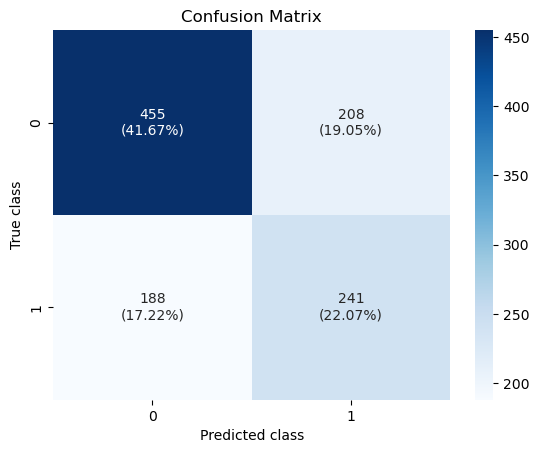

In [36]:
# normalize='true' per avere la matrice normalizzata 
cm_dtc = confusion_matrix(y_test, y_pred) 
print(type(cm_dtc))
plot_confusion_matrix(cm_dtc)



### Confrontare i risultati ottenuti con quelli ottenuti con una predizione basata sul modello Logistic Regression (ignorare eventuali warning). Effettuare alcune considerazioni sui risultati ottenuti, tenendo in considerazione anche l’analisi della confusion matrix e la predizione effettuata da un dummy classifier. (punti 4)

acc train 0.7198917456021651
acc test 0.7307692307692307
              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80       663
         1.0       0.72      0.52      0.60       429

    accuracy                           0.73      1092
   macro avg       0.73      0.69      0.70      1092
weighted avg       0.73      0.73      0.72      1092



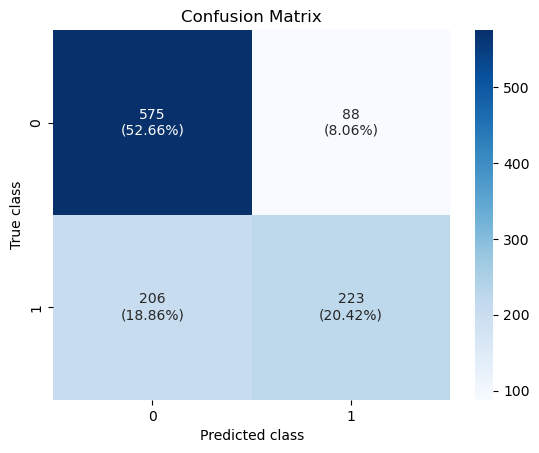

In [37]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
acc_train = accuracy_score(y_train, y_pred)
y_pred = lr.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print('acc train', acc_train)
print('acc test', acc_test)

#create confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_lr)

### DUMMY CLASSIFIER

acc train 0.5994587280108254
acc test 0.6071428571428571
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       663
         1.0       0.00      0.00      0.00       429

    accuracy                           0.61      1092
   macro avg       0.30      0.50      0.38      1092
weighted avg       0.37      0.61      0.46      1092



c:\Users\39379\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\39379\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\39379\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


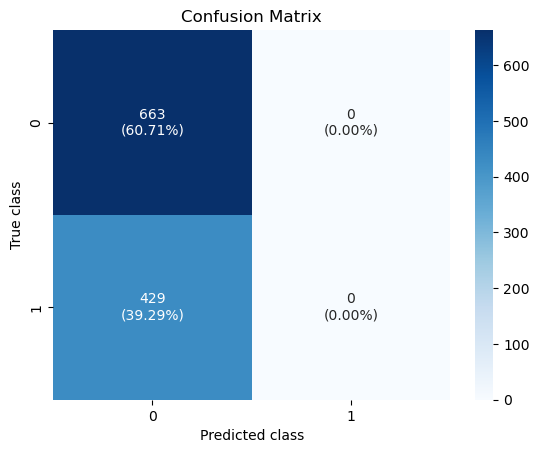

In [38]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent', random_state=0)
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_train)
acc_train = accuracy_score(y_train, y_pred)
y_pred = dummy.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print('acc train', acc_train)
print('acc test', acc_test)

cm_dummy = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_dummy)

si puo notare che ogni classificatore predice meglio la classe 0 che la classe 1.

Questo è dovuto al fatto che la classe 0 è piu numerosa della classe 1 nel dataset.

Infatti sia la logistic regression che il decision tree forniscono un rate maggiore di true negative che di true positive.

I true positive sono quanti i false positive .

Il dummy classifier conferma questa tendenza mostrando che facendo una predizione basata sulla classe piu numerosa tutti gli elementi sono classificati come appartenti alla classe 0.


### 2. Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza si ottiene con un una 10 Fold cross validation. (punti 1)

In [39]:
from sklearn.model_selection import cross_val_score

# faccio il cross validation sul decision tree dtc con 10 fold 
cross_val = cross_val_score(dtc, dataset, y, cv=10)
print('accuracy per ogni fold', cross_val)
print('accuracy media', cross_val.mean())
print("Accuracy con incertezza: %0.2f (+/- %0.2f)" % (cross_val.mean(), cross_val.std() * 2))

accuracy per ogni fold [0.64652568 0.63141994 0.6858006  0.67673716 0.67673716 0.65558912
 0.67673716 0.66767372 0.6978852  0.66363636]
accuracy media 0.6678742103817633
Accuracy con incertezza: 0.67 (+/- 0.04)


In [40]:
# faccio il cross validation sul logistic regression lr con 10 fold
cross_val = cross_val_score(lr, dataset, y, cv=10)
print(cross_val)
print('Accuracy media', cross_val.mean())
print("Accuracy con incertezza: %0.2f (+/- %0.2f)" % (cross_val.mean(), cross_val.std() * 2))

[0.71299094 0.71601208 0.74320242 0.72205438 0.73413897 0.67975831
 0.70694864 0.75528701 0.73413897 0.70606061]
Accuracy media 0.7210592328114986
Accuracy con incertezza: 0.72 (+/- 0.04)


### 3. Trovare i parametri migliori del classificatore decision tree.
- parametri:
    -  criterion, max_features e min_samples_split. 
    
### Verificare se l’accuratezza che si ottiene con la nuova configurazione supera quella standard ottenuta al punto 1 (punti 4)

### GreedSearch su un DecisionTreeClassifier

In [41]:
from sklearn.model_selection import GridSearchCV

X = dataset
y = y
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=0)

# grid search per decision tree
parameters = {'criterion':( 'gini', 'entropy'),
            'max_features':('sqrt', 'log2'), 
            'min_samples_split':[2, 4, 6]
            }

# iatanzia il modello
dtc_grid = DecisionTreeClassifier()

# istanzia il modello grid search e gli passo il modell
clf = GridSearchCV(dtc_grid, parameters, cv=10)


clf.fit(X_train, y_train)

# stampo tutti gli score per ogni combinazione di parametri
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

# stampo i parametri migliori
print('best parameters: ', clf.best_params_)
print('with accuracy: ', clf.best_score_)
print()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()





Grid scores on development set:

0.641 (+/-0.066) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2}
0.668 (+/-0.073) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 4}
0.664 (+/-0.085) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 6}
0.647 (+/-0.063) for {'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 2}
0.656 (+/-0.065) for {'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 4}
0.638 (+/-0.063) for {'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 6}
0.676 (+/-0.065) for {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 2}
0.673 (+/-0.051) for {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 4}
0.658 (+/-0.077) for {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 6}
0.644 (+/-0.041) for {'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 2}
0.637 (+/-0.049) for {'criterion': 'entropy',

### 4. Introdurre una discretizzazione degli attributi AGE e THROMBOCYTE, e utilizzare la funzione MaxAbsScaler  per scalare i valori del dataset tra 0 e 1 e confrontare se l’accuratezza ottenuta con il Decision Tree Classifier e con la Logistic Regression migliora (punti 3).

In [42]:
dataset 


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,123.0,54.0,166.0,35.0,130.0,94.0,50.0,185.0,32.0,0.0
1,231.0,83.0,390.0,52.0,212.0,35.0,36.0,42.0,35.0,1.0
2,214.0,83.0,205.0,51.0,316.0,134.0,48.0,315.0,69.0,0.0
3,204.0,87.0,215.0,24.0,256.0,136.0,66.0,273.0,17.0,0.0
4,191.0,76.0,233.0,138.0,509.0,102.0,50.0,213.0,35.0,1.0
...,...,...,...,...,...,...,...,...,...,...
3304,175.0,75.0,193.0,29.0,33.0,125.0,60.0,252.0,44.0,1.0
3305,40.0,25.0,75.0,43.0,70.0,79.0,45.0,153.0,0.0,0.0
3306,167.0,67.0,188.0,73.0,308.0,110.0,47.0,244.0,63.0,1.0
3307,219.0,95.0,277.0,90.0,306.0,115.0,72.0,196.0,32.0,1.0


In [43]:
y

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3304    1.0
3305    1.0
3306    0.0
3307    0.0
3308    1.0
Name: SOURCE, Length: 3309, dtype: float64

In [44]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
# Seleziona gli attributi da discretizzare
X = dataset[['AGE', 'THROMBOCYTE']]
print(X)

# Crea un oggetto KBinsDiscretizer per la discretizzazione
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Applica la discretizzazione agli attributi selezionati
X_discretized = discretizer.fit_transform(X)

# Crea un DataFrame con gli attributi discretizzati
df_discretized = pd.DataFrame(X_discretized, columns=['AGE_discretized', 'THROMBOCYTE_discretized'])
print(df_discretized)
# Combina i dati discretizzati con il resto del dataset
df_combined = pd.concat([dataset, df_discretized], axis=1)
df_combined
# Applica la scala MaxAbs agli attributi
scaler = MaxAbsScaler()
df_scaled = scaler.fit_transform(df_combined)
df_scaled = pd.DataFrame(df_scaled, columns=df_combined.columns)
df_scaled

       AGE  THROMBOCYTE
0     32.0        130.0
1     35.0        212.0
2     69.0        316.0
3     17.0        256.0
4     35.0        509.0
...    ...          ...
3304  44.0         33.0
3305   0.0         70.0
3306  63.0        308.0
3307  32.0        306.0
3308  71.0        194.0

[3309 rows x 2 columns]
      AGE_discretized  THROMBOCYTE_discretized
0                 0.0                      0.0
1                 1.0                      1.0
2                 2.0                      2.0
3                 0.0                      1.0
4                 1.0                      2.0
...               ...                      ...
3304              1.0                      0.0
3305              0.0                      0.0
3306              2.0                      2.0
3307              0.0                      2.0
3308              2.0                      0.0

[3309 rows x 2 columns]


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,AGE_discretized,THROMBOCYTE_discretized
0,0.392971,0.425197,0.409877,0.137795,0.248092,0.534091,0.50,0.475578,0.340426,0.0,0.0,0.0
1,0.738019,0.653543,0.962963,0.204724,0.404580,0.198864,0.36,0.107969,0.372340,1.0,0.5,0.5
2,0.683706,0.653543,0.506173,0.200787,0.603053,0.761364,0.48,0.809769,0.734043,0.0,1.0,1.0
3,0.651757,0.685039,0.530864,0.094488,0.488550,0.772727,0.66,0.701799,0.180851,0.0,0.0,0.5
4,0.610224,0.598425,0.575309,0.543307,0.971374,0.579545,0.50,0.547558,0.372340,1.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3304,0.559105,0.590551,0.476543,0.114173,0.062977,0.710227,0.60,0.647815,0.468085,1.0,0.5,0.0
3305,0.127796,0.196850,0.185185,0.169291,0.133588,0.448864,0.45,0.393316,0.000000,0.0,0.0,0.0
3306,0.533546,0.527559,0.464198,0.287402,0.587786,0.625000,0.47,0.627249,0.670213,1.0,1.0,1.0
3307,0.699681,0.748031,0.683951,0.354331,0.583969,0.653409,0.72,0.503856,0.340426,1.0,0.0,1.0


In [45]:
#prepare scaled dataset for classification
dct_scaled = DecisionTreeClassifier()
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=0)

In [46]:
#train and test decision tree on scaled data
dct_scaled.fit(X_train, y_train)
y_pred = dct_scaled.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print('acc test', acc_test)

#train and test logistic regression on scaled data
lr_scaled = LogisticRegression(solver='liblinear')
lr_scaled.fit(X_train, y_train)
y_pred = lr_scaled.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print('acc test', acc_test)


acc test 0.5933534743202417
acc test 0.6876132930513595
